# Convolutional Neural Networks: CIFAR10

#### <b>Problem Statement</b>

We will be using the TensorFlow libraries to build a CNN model that performs classification over the CIFAR10 dataset. The objective is to train the architecture to classify the images with maximum accuracy.

<br>

#### <b>Tasks</b>

1. Understanding image structure
2. Image classification using simple ANN architecture
3. Implementing convolution over a sample image
4. Image classification using simple CNN architecture
5. Experimentation

<br>

#### <b>About the Dataset</b>
CIFAR-10 dataset is an image repository that consists of 60,000 RGB images each of size (32, 32, 3). There are 10 different classes with 6,000 images in each class:
* aeroplane
* automobile
* bird
* deer
* dog
* frog
* horse
* ship
* truck

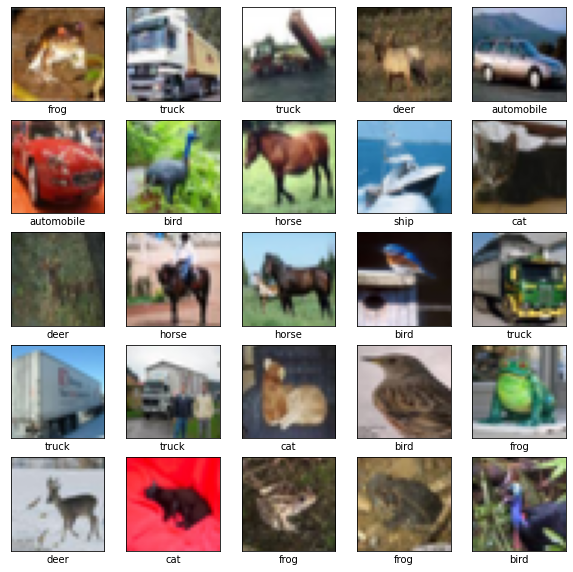



#### <b>Architecture</b>
We will be working with the simple CNN architecture. Here, we will be working with reduced number of layers in comparison to the VGGNet architecture as the size of the images is 32\*32 instead of 224\*224.


## Demonstration

#### <b>Import TensorFlow</b>

In [ ]:
# importing the required libraries
import tensorflow as tf

# importing different elements (datasets, layers, etc.) to build the CNN model
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D , Dropout

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

#### <b>Loading the CIFAR10 dataset</b>


The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
# Loading the dataset - Train, test
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Defining output classes - 10 labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#### **Verify the data**

To verify that the dataset looks correct, let's check the size of the datasets. Also, we will plot the first 25 images from the training set and display the class name associated with them.


In [ ]:
# Size of training data
print(f'''Training set size - {train_images.shape}
-- There are 50,000 images for training our model.
-- Each image is 32x32 pixels and has 3 color channels.
''')

print(f'''Training labels size - {train_labels.shape}
-- There are 50,000 corresponding training labels (one for each image).
''')

Training set size - (50000, 32, 32, 3)
-- There are 50,000 images for training our model.
-- Each image is 32x32 pixels and has 3 color channels.

Training labels size - (50000, 1)
-- There are 50,000 corresponding training labels (one for each image).



In [ ]:
# Similar activity for test data
print(f'''Testing set size - {test_images.shape}
-- There are 10,000 images for testing our model.
-- Each image is 32x32 pixels and has 3 color channels.
''')

print(f'''Testing labels size - {test_labels.shape}
-- There are 10,000 corresponding testing labels.
''')

Testing set size - (10000, 32, 32, 3)
-- There are 10,000 images for testing our model.
-- Each image is 32x32 pixels and has 3 color channels.

Testing labels size - (10000, 1)
-- There are 10,000 corresponding testing labels.



#### **Exploring the images**

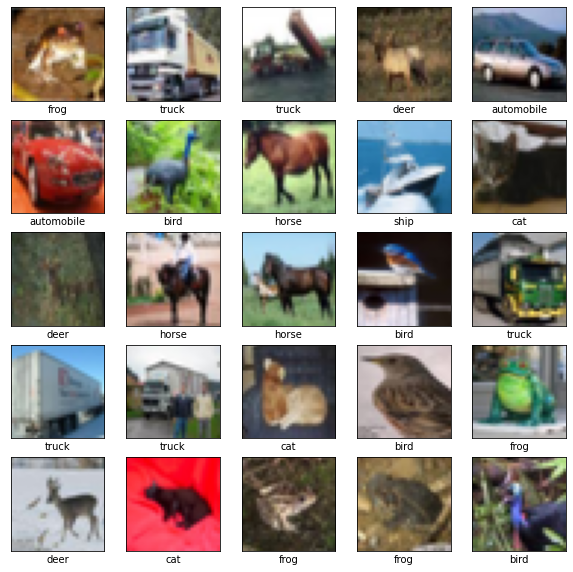

In [ ]:
# Plotting first 25 images with their labels

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    
    # The CIFAR labels are stored as arrays.
    # So, you need an extra index.
    
    plt.xlabel(class_names[train_labels[i][0]])

# Plotting the images
plt.show()

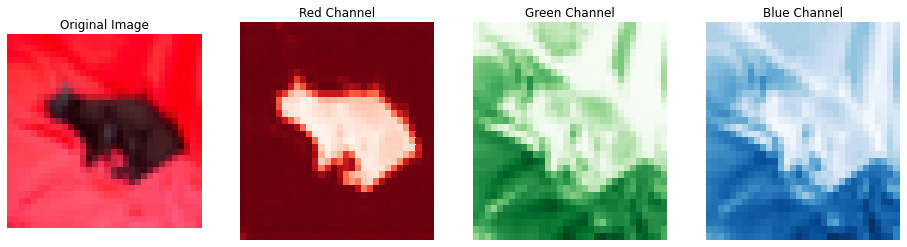

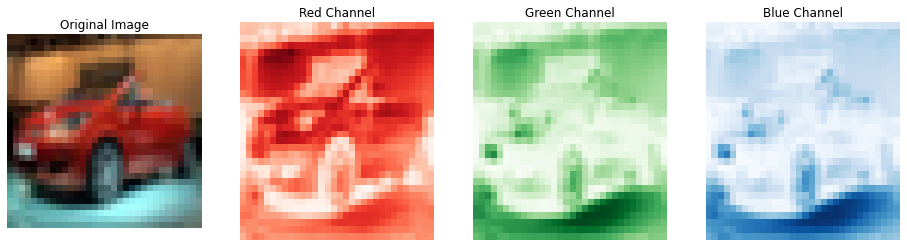

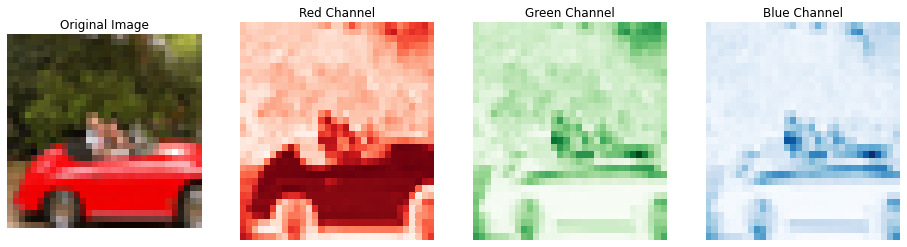

In [ ]:
# Separating the channels for sample images: 21, 45, 99

images_indices=[21,45,99]
for i in range(len(images_indices)):
  image_array = train_images[images_indices[i]]
  
  # print("Shape of an image - ",image_array.shape)
  
  plt.figure(figsize=(16,4))

  # Original image
  plt.subplot(1,4,1)
  plt.imshow(image_array, cmap=plt.cm.binary)
  plt.axis('off')
  plt.title("Original Image")

  # Red channel
  plt.subplot(1,4,2)
  sns.heatmap(image_array[:,:,0],cmap='Reds',cbar=False)
  plt.axis('off')
  plt.title("Red Channel")

  # Green channel
  plt.subplot(1,4,3)
  sns.heatmap(image_array[:,:,1],cmap='Greens',cbar=False)
  plt.axis('off')
  plt.title("Green Channel")

  # Blue channel
  plt.subplot(1,4,4)
  sns.heatmap(image_array[:,:,2],cmap='Blues',cbar=False)
  plt.axis('off')
  plt.title("Blue Channel")
  plt.show()

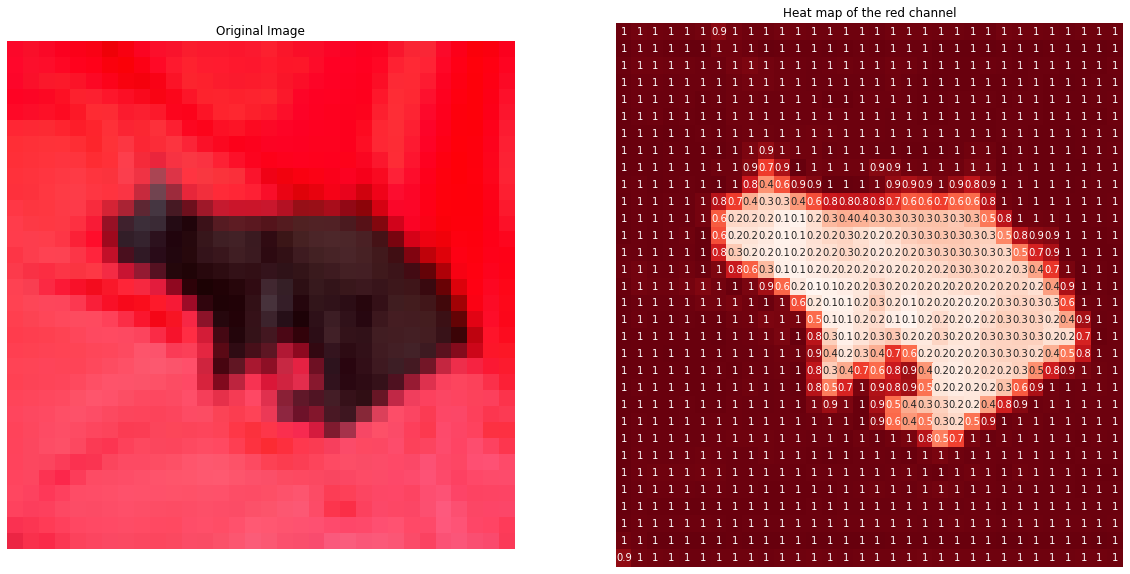

In [ ]:
# Exploring the normalised values for the red channel

# Original image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(train_images[21], cmap=plt.cm.binary)
plt.title("Original Image")
plt.axis('off')

# Heat map that highlights normalised the pixel values
plt.subplot(1,2,2)
sns.heatmap(train_images[21][:,:,0],annot=True, fmt='.1g', cmap='Reds', cbar=False)
plt.axis('off')
plt.title("Heat map of the red channel")
plt.show()

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


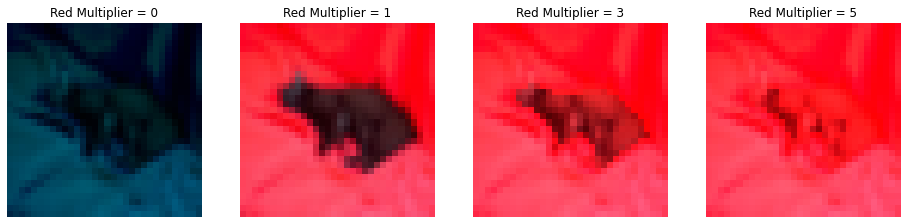

In [ ]:
# Changing the intensity of red channel in the image 21

plt.figure(figsize=(16,4)) 

# 0: Red channel is eliminated
# 1: Red channel is kept same
# 3, 5: Red channel is intensified

red_enhancement_factors=[0,1,3,5]

# Plotting the images
for i in range(len(red_enhancement_factors)):
  image_array=train_images[21].copy()
  plt.subplot(1,4,i+1)
  
  # 
  image_array[:,:,0]=image_array[:,:,0]*red_enhancement_factors[i]
  plt.imshow(image_array, cmap=plt.cm.binary)
  plt.axis('off')
  plt.title("Red Multiplier = {}".format(red_enhancement_factors[i]))
plt.show()

#### **Vanilla ANNs**

First, we will try to use the simple ANN framework to build the model for classification

### Fully connected ANNs

In [1]:
# Defining the model
model = models.Sequential()

# Defining the layers
model.add(layers.Flatten())
model.add(layers.Dense(2**10, activation='relu'))
model.add(layers.Dense(10))

NameError: ignored

In [ ]:
# Defining the model parameters
# optimizer: adam (SGD)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fitting the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 8s 3ms/step - loss: 1.9019 - accuracy: 0.3287 - val_loss: 1.7254 - val_accuracy: 0.3901
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6897 - accuracy: 0.3967 - val_loss: 1.6717 - val_accuracy: 0.3963
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6298 - accuracy: 0.4214 - val_loss: 1.7043 - val_accuracy: 0.3940
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5871 - accuracy: 0.4358 - val_loss: 1.6139 - val_accuracy: 0.4223
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5550 - accuracy: 0.4451 - val_loss: 1.5256 - val_accuracy: 0.4564
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5337 - accuracy: 0.4536 - val_loss: 1.5537 - val_accuracy: 0.4422
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5148 - accuracy: 0.4626 - val_loss: 1.5211 - val_accuracy:

In [ ]:
# Model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 3,157,002
Trainable params: 3,157,002
Non-trainable params: 0
_________________________________________________________________


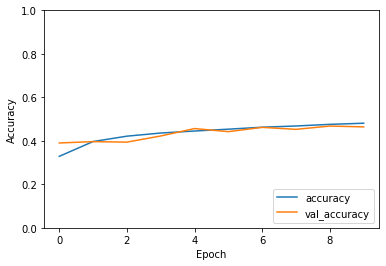

In [ ]:
# Plotting accuracy over train and test data
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

As you can see, the accuracy doesn't increase much with each epoch and the value is also very low.

In [ ]:
# Experimenting with the dense layers

# Defining the model
model = models.Sequential()

# Defining the layers
model.add(layers.Flatten())

# Varying the number of dense layers
for i in range(5):
  model.add(layers.Dense(2**9/(i+1), activation='relu'))
model.add(layers.Dense(10))

# Defining the model parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fitting the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Results
model.summary()

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8938 - accuracy: 0.3062 - val_loss: 1.7763 - val_accuracy: 0.3518
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7350 - accuracy: 0.3736 - val_loss: 1.6511 - val_accuracy: 0.3954
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6453 - accuracy: 0.4065 - val_loss: 1.6040 - val_accuracy: 0.4241
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5809 - accuracy: 0.4289 - val_loss: 1.6081 - val_accuracy: 0.4229
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5435 - accuracy: 0.4462 - val_loss: 1.5871 - val_accuracy: 0.4379
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5093 - accuracy: 0.4573 - val_loss: 1.5595 - val_accuracy: 0.4451
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4776 - accuracy: 0.4711 - val_loss: 1.4805 - val_accuracy:

Even after experimenting with the dense layers, the accuraccy value didn't increase much.

In [ ]:
# Defining the model
model = models.Sequential()

# Defining the layers
model.add(layers.Flatten())
for i in range(5):
  model.add(layers.Dense(2**9/(i+1), activation='relu'))
model.add(layers.Dense(10))

# Defining the model parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Increasing the epoch value
history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

# Results
model.summary()

Epoch 1/50
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9054 - accuracy: 0.2992 - val_loss: 1.7647 - val_accuracy: 0.3473
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7242 - accuracy: 0.3765 - val_loss: 1.7260 - val_accuracy: 0.3738
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6389 - accuracy: 0.4115 - val_loss: 1.6001 - val_accuracy: 0.4271
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5868 - accuracy: 0.4293 - val_loss: 1.5895 - val_accuracy: 0.4353
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5471 - accuracy: 0.4442 - val_loss: 1.5373 - val_accuracy: 0.4535
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5030 - accuracy: 0.4601 - val_loss: 1.5583 - val_accuracy: 0.4470
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4740 - accuracy: 0.4721 - val_loss: 1.5250 - val_accuracy:

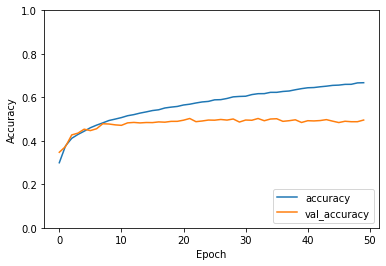

In [ ]:
# Plotting accuracy over train and test data
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Adding the number of epochs resulted in great improvement in the train accuracy. However, there is no change in the test accuracy. This suggests that the model has started to overfit over the data.

<br>

### **Convolutional Neural Networks**

#### Creating the CNN architecture

Now, we define the CNN architecture using a stack of the convolution and the max pooling layers.

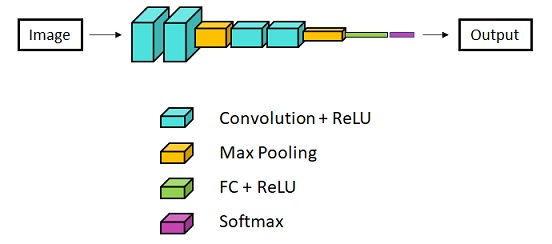

As input, a CNN takes the tensors of shape (image_height, image_width, color_channels). Here, we will now configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images.

In [ ]:
# Defining the model
model = models.Sequential()

# Adding layers to the model

# 1st Conv Block - 2 convolution layers and 1 Pooling layer

# Convolution and Normalisation
# General Syntax
# tf.keras.layers.Conv2D(
#    filters, kernel_size, strides=(1, 1), padding='valid', activation=None)

# Input layer with 32 filters of size 3*3
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu'))

# Pooling layer
# General Syntax
# tf.keras.layers.MaxPool2D(
#    pool_size=(2, 2), strides=None, padding='valid')

model.add(layers.MaxPooling2D((2, 2)))

# 2nd Conv Block - 2 convolution layers and 1 Pooling layer
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

Let's display the architecture of our model so far.

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
Total params: 65,568
Trainable params: 65,568
Non-trainable params: 0
__________________________________________________

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). 


* The width and height dimensions tend to shrink as you go deeper in the network due to pooling. 
* The number of output channels for each Conv2D layer represent the feature maps. 

#### Adding Dense layers
To complete our model, we will require the dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor (height, width, channels). 

First, you will have flatten the 3D output to 1D. This can be done by adding sense layers on top. 

Finally, CIFAR10 has 10 output classes, so the softmax function is applied using the final dense layer having 10 outputs.

In [ ]:
# Fully connected layer
model.add(Flatten())
model.add(Dense(512, activation ='relu'))

# Output Layer
model.add(Dense(10, activation='softmax'))

Here's the complete architecture of our model.

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

#### Compile and train the model

In [ ]:
# Defining the model parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fitting the model over train and test data
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 36s 5ms/step - loss: 1.2804 - accuracy: 0.5391 - val_loss: 1.0096 - val_accuracy: 0.6451
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8267 - accuracy: 0.7088 - val_loss: 0.8143 - val_accuracy: 0.7153
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6131 - accuracy: 0.7857 - val_loss: 0.7864 - val_accuracy: 0.7350
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4298 - accuracy: 0.8492 - val_loss: 0.8209 - val_accuracy: 0.7343
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2740 - accuracy: 0.9045 - val_loss: 0.9403 - val_accuracy: 0.7471
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1736 - accuracy: 0.9393 - val_loss: 1.1391 - val_accuracy: 0.7388
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1248 - accuracy: 0.9563 - val_loss: 1.2882 - val_accuracy

#### Evaluate the model

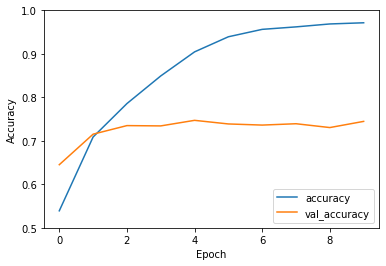

In [ ]:
# Plotting accuracy over train and test data against the Epoch value
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
# Evaluating the test accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 13s - loss: 1.5242 - accuracy: 0.7405
0.7404999732971191


Our simple CNN performs much better than the ANN as it has achieved a test accuracy of over 74%. Another observation that you should make from the graph is that the model tends to overfit as the number of epochs increase.

### **Experiments with the CNN model**

#### Increasing Number of epochs

Let's try to understand if increasing the iterations for learning the parameters of the model increases the accuracy over test dataset or not.

In [ ]:
model = models.Sequential()

# Convolution and Pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

# Adding the output layer
model.add(layers.Dense(10))

# Model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)             

Epoch 1/50
1563/1563 [==============================] - 8s 4ms/step - loss: 1.4240 - accuracy: 0.4860 - val_loss: 1.1653 - val_accuracy: 0.5807
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0040 - accuracy: 0.6468 - val_loss: 0.9383 - val_accuracy: 0.6694
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8087 - accuracy: 0.7170 - val_loss: 0.8268 - val_accuracy: 0.7143
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6695 - accuracy: 0.7662 - val_loss: 0.8543 - val_accuracy: 0.7089
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5506 - accuracy: 0.8061 - val_loss: 0.8238 - val_accuracy: 0.7295
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4439 - accuracy: 0.8423 - val_loss: 0.8476 - val_accuracy: 0.7391
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3516 - accuracy: 0.8744 - val_loss: 0.9349 - val_accuracy:

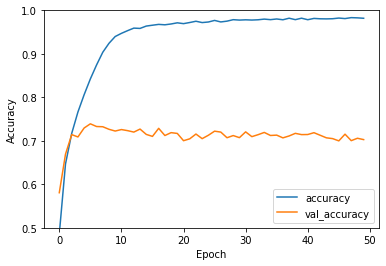

In [ ]:
# Model parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model training with 50 epochs (Previously it was 10)
history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

# Plotting the accuracy values
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
# Evaluating the test accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 3.6734 - accuracy: 0.7028
0.7027999758720398


As you can see, increasing the epoch value doesn't result in any improvement over the test data.

#### Adding Dropout

Prevents the overfitting in the model by randomly dropping contribution of some neurons towards the next layer.

In [ ]:
model = models.Sequential()

# Convolution and Pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Flattening and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

# Higher dropout value for dense layers
model.add(layers.Dropout(0.5))

# Adding the output layer
model.add(layers.Dense(10))

# Model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)         

In [ ]:
# Defining the model parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fitting the model over train and test data
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5135 - accuracy: 0.4485 - val_loss: 1.1867 - val_accuracy: 0.5762
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1475 - accuracy: 0.5929 - val_loss: 1.0548 - val_accuracy: 0.6322
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9951 - accuracy: 0.6501 - val_loss: 0.8725 - val_accuracy: 0.6982
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9034 - accuracy: 0.6840 - val_loss: 0.8148 - val_accuracy: 0.7178
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8453 - accuracy: 0.7051 - val_loss: 0.8205 - val_accuracy: 0.7227
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7939 - accuracy: 0.7228 - val_loss: 0.7681 - val_accuracy: 0.7379
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7580 - accuracy: 0.7349 - val_loss: 0.7176 - val_accuracy:

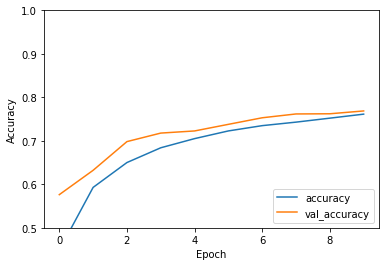

In [ ]:
# Plotting accuracy over train and test data against the Epoch value
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
# Evaluating the test accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.6869 - accuracy: 0.7687
0.7687000036239624


As it can be seen, dropouts help in solving the problem of overfitting. Even, the accuracy over the test data has increased.

#### Adding Batch Normalization (without dropouts)



Batch 

In [ ]:
model = models.Sequential()

# Convolution and Pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Flattening and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

# Adding the output layer
model.add(layers.Dense(10))

# Model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 64)       

In [ ]:
# Defining the model parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fitting the model over train and test data
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2363 - accuracy: 0.5651 - val_loss: 1.1850 - val_accuracy: 0.6031
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8099 - accuracy: 0.7162 - val_loss: 0.8921 - val_accuracy: 0.6924
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6465 - accuracy: 0.7744 - val_loss: 0.8793 - val_accuracy: 0.6993
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5014 - accuracy: 0.8238 - val_loss: 1.0938 - val_accuracy: 0.6475
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3837 - accuracy: 0.8664 - val_loss: 0.8110 - val_accuracy: 0.7546
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2798 - accuracy: 0.9017 - val_loss: 0.8749 - val_accuracy: 0.7640
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2067 - accuracy: 0.9280 - val_loss: 1.0488 - val_accuracy:

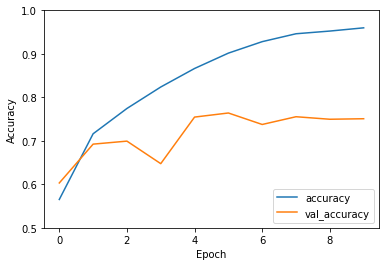

In [ ]:
# Plotting accuracy over train and test data against the Epoch value
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
# Evaluating the test accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 1.3497 - accuracy: 0.7508
0.7508000135421753


Batch normalisation also results in improvement of the model. The accuracy has increased from 70% to 75% over the test data. However, the problem of overfitting has returned as there are dense layers in the architecture.

#### Increasing Convolutional Units

In [ ]:
# Defining the model
model = models.Sequential()

# Adding layers to the model

# 1st Conv Block - 2 convolution layers and 1 Pooling layer
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Conv Block - 2 convolution layers and 1 Pooling layer
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Conv Block - 2 convolution layers and 1 Pooling layer
model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

# Adding the output layer
model.add(layers.Dense(10))

# Model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
# Defining the model parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fitting the model over train and test data
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 418s 267ms/step - loss: 1.4614 - accuracy: 0.4665 - val_loss: 1.1069 - val_accuracy: 0.6116
Epoch 2/5
1563/1563 [==============================] - 421s 269ms/step - loss: 0.9645 - accuracy: 0.6562 - val_loss: 0.9157 - val_accuracy: 0.6794
Epoch 3/5
1563/1563 [==============================] - 427s 274ms/step - loss: 0.7642 - accuracy: 0.7310 - val_loss: 0.7666 - val_accuracy: 0.7336
Epoch 4/5
1563/1563 [==============================] - 424s 271ms/step - loss: 0.6227 - accuracy: 0.7809 - val_loss: 0.7290 - val_accuracy: 0.7481
Epoch 5/5
1563/1563 [==============================] - 433s 277ms/step - loss: 0.5121 - accuracy: 0.8185 - val_loss: 0.7796 - val_accuracy: 0.7436


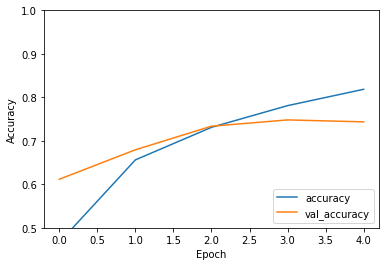

In [ ]:
# Plotting accuracy over train and test data against the Epoch value
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
# Evaluating the test accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 20s - loss: 0.7796 - accuracy: 0.7436
0.7436000108718872


#### Increasing the feature maps

In [ ]:
model = models.Sequential()

# Convolution and Pooling layers
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Flattening and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

# Adding the output layer
model.add(layers.Dense(10))

In [ ]:
# Defining the model parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fitting the model over train and test data
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


# Model summary
model.summary()

Epoch 1/10
1563/1563 [==============================] - 15s 8ms/step - loss: 1.5626 - accuracy: 0.4591 - val_loss: 1.1262 - val_accuracy: 0.5919
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1178 - accuracy: 0.6118 - val_loss: 1.0768 - val_accuracy: 0.6290
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9695 - accuracy: 0.6668 - val_loss: 1.0825 - val_accuracy: 0.6452
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8692 - accuracy: 0.7037 - val_loss: 0.7542 - val_accuracy: 0.7405
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7854 - accuracy: 0.7297 - val_loss: 0.8437 - val_accuracy: 0.7213
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7230 - accuracy: 0.7504 - val_loss: 0.6992 - val_accuracy: 0.7621
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6622 - accuracy: 0.7750 - val_loss: 0.9069 - val_ac

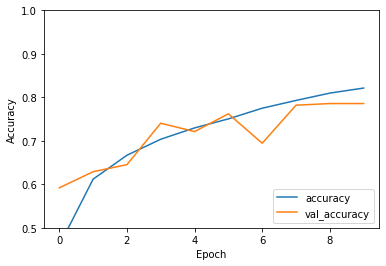

In [ ]:
# Plotting accuracy over train and test data against the Epoch value
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
# Evaluating the test accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.6494 - accuracy: 0.7857
0.7857000231742859
